In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import plotly
import plotly.graph_objs as go
import cufflinks as cf
import calendar
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
plotly.offline.init_notebook_mode(connected=True)
print(__version__)
cf.go_offline()
from matplotlib.cbook import MatplotlibDeprecationWarning
import warnings #removes the get_axes depreciated warning
pd.set_option('mode.chained_assignment', None) #Removes the Settingwiththecopy Warning

2.0.15


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [2]:
#Reads the different CSV files and assigns it to the respective data frames specified
#Data was cleaned and missing data in the dis_amount field was removed.
#The column formatting for dis_amo was changed to number from currency in excel

d1=pd.read_csv('all_house_senate_2010.csv',dtype= {'dis_amo':float, 'cat_cod':str})
d2=pd.read_csv('2012.csv',dtype= {'dis_amo':float, 'cat_cod':str})
d3=pd.read_csv('all_house_senate_2014.csv',dtype= {'dis_amo':float, 'cat_cod':str})
d4=pd.read_csv('all_house_senate_2016.csv',encoding='ANSI',dtype= {'dis_amo':float, 'cat_cod':str})

C:\Users\Vishal\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning:

Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
df = pd.concat([d1, d2, d3, d4],axis=0, ignore_index=True) #concatinates all the data into a single dataframe
df['dis_dat']=pd.to_datetime(df['dis_dat'], format="%m/%d/%Y", errors='coerce') #To convert the date values in the dataframe to Date Format

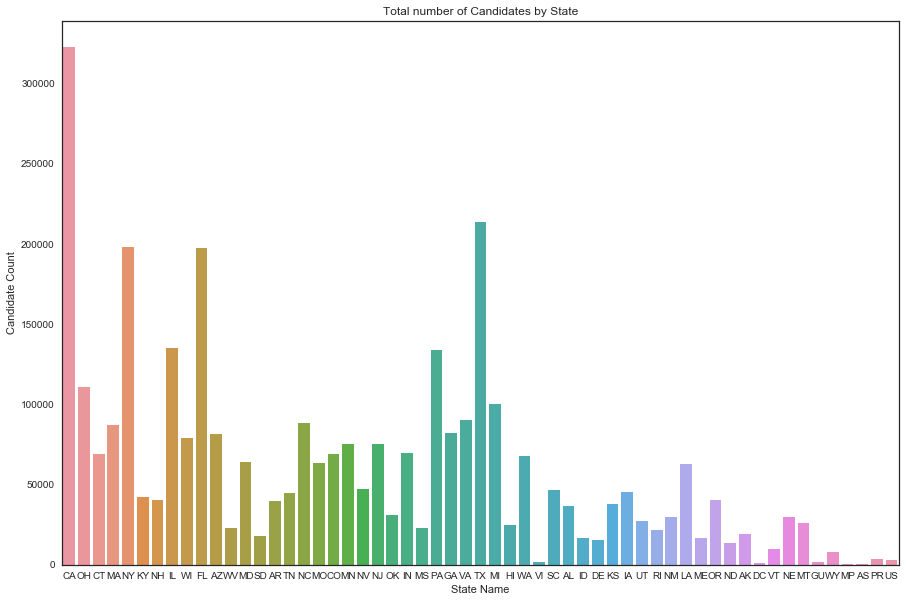

In [4]:
#Count of candidates standing according to states over all years

plt.figure(figsize=(15,10)) #Changes the default graph size
sns.set_style('white') #changes the graph background color
plt.title('Total number of Candidates by State')
graph=sns.countplot(x='can_off_sta',data=df) #plots the graph
graph.set(xlabel='State Name', ylabel='Candidate Count') #Changes the X axis and Y axis labels

In [5]:
#Amount Dispersed by each state every year for elections
#Scroll-in in the plot to get more detailed info on all states

#My plotly graphs have had compatibility problems with plotly version 2.0.15 and my chrome version. They seem to work fine now.
#please send me an email if you are not able to see the visualizations for line no 5 and line no 8 and I can provide s-shots of the same.

layout=go.Layout(title="Yearwise amount dispersed by State", xaxis={'title':'State Name'}, yaxis={'title':'Year'}) #customize the graph layout
df1=df.groupby(['ele_yea','can_off_sta'],as_index=False).sum() #groups the rows based on bac_ref_id and generatates the sum
df1.iplot(kind='bubble',x='can_off_sta',y='ele_yea',size='dis_amo',layout=layout) #Plots the graph

C:\Users\Vishal\Anaconda3\lib\site-packages\matplotlib\artist.py:233: MatplotlibDeprecationWarning:

get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.



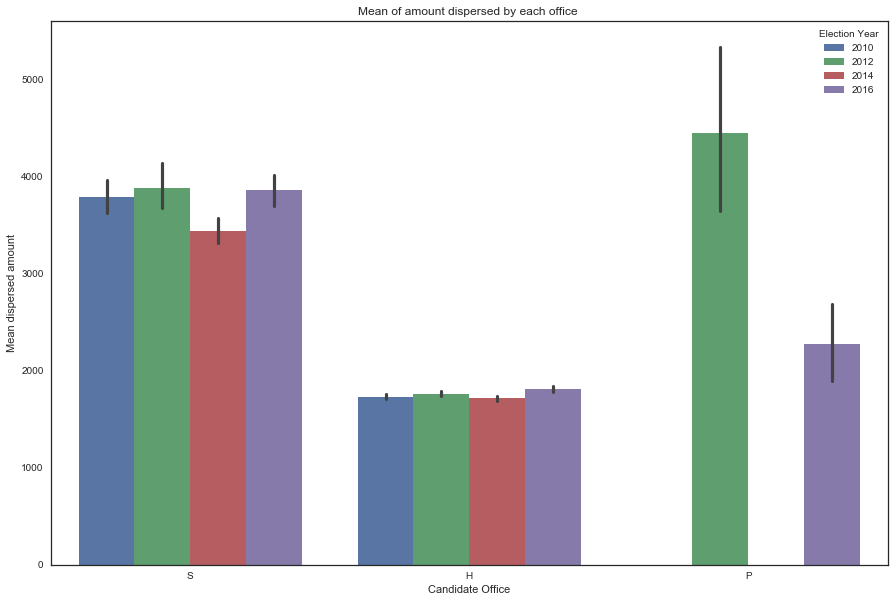

In [6]:
#Mean of dispersed amounts by each candidate office every year
#Plot takes a little longer than usual to generate

plt.figure(figsize=(15,10))
plt.title('Mean of amount dispersed by each office ')
graph=sns.barplot(x='can_off', y='dis_amo', hue='ele_yea', data=df) #plots the graph
graph.get_axes().legend(title= 'Election Year',) #To set custom legend title
graph.set(xlabel='Candidate Office', ylabel='Mean dispersed amount')

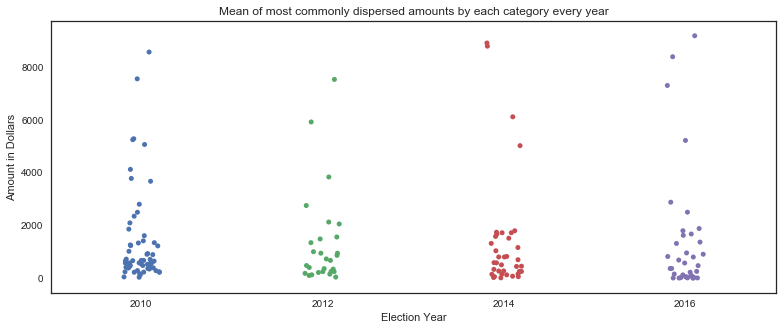

In [7]:
#Mean of most commonly dispersed amounts by each category

plt.figure(figsize=(13,5))
plt.title('Mean of most commonly dispersed amounts by each category every year')
df1=df.groupby(['ele_yea','cat_cod'],as_index= False).mean() #groups the rows based on ele_yea and cat_cod and generatates the mean
df1=df1[df1.dis_amo < 10000] #Slices the dataframe to include only rows specified in the condition
graph= sns.stripplot(x='ele_yea',y='dis_amo',data=df1, jitter= True) #plots the graph
graph.set(xlabel='Election Year', ylabel='Amount in Dollars')

In [8]:
#States with transactions that have backreference ids

df1= df.dropna(subset=['bac_ref_id']) #to find all rows that have a back reference ID and remove those that are null
df1['counter']=1 #to get the total after grouping the reference IDS
df1=df1.groupby(['can_off_sta'],as_index=False).sum() #groups the rows based on can_off_sta and generatates the sum
df1=df1.drop(['ele_yea','can_off_dis','dis_amo'], axis=1) #drops the specified columns
layout=go.Layout(title="Transactions with backreference IDs by State", xaxis={'title':'State Name'}, yaxis={'title':'Transaction Count'}) #Sets the custom layout 
df1.iplot(kind='bar',x='can_off_sta',y='counter',layout=layout) #plots the graph

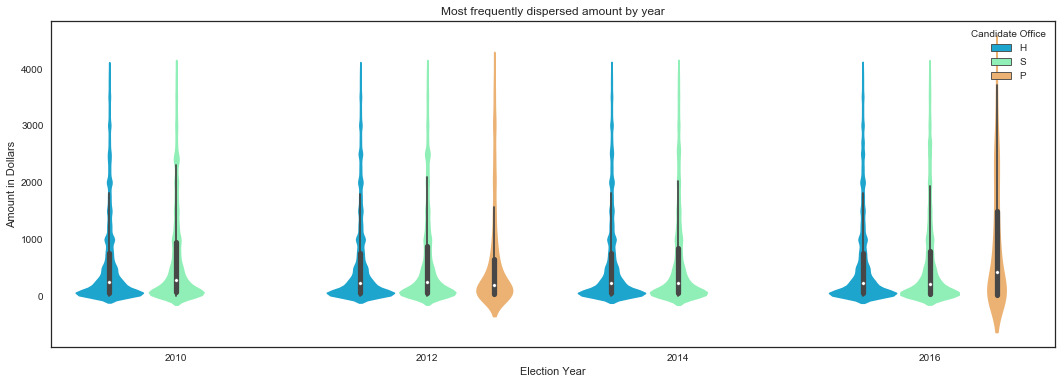

In [9]:
#Transaction Amounts by each house every year of most frequently dispersed amounts

df1=df[df.dis_amo < 4000] #Slices the dataframe to include only rows specified in the condition
df2=df1[df1.dis_amo > 0] #Slices the dataframe to include only rows specified in the condition
plt.figure(figsize=(18,6))
graph=sns.violinplot(x='ele_yea', y='dis_amo',hue='can_off', data=df2, palette='rainbow') #plots the graph
plt.title('Most frequently dispersed amount by year')
graph.set(xlabel='Election Year', ylabel='Amount in Dollars') #To specify xaxis and yaxis labels
graph.legend(title= 'Candidate Office')

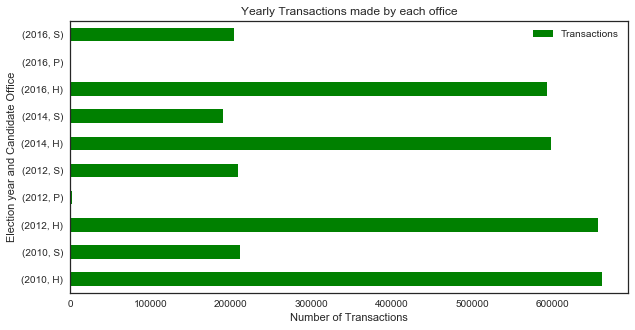

In [10]:
#Number of Transactions made each year

df1= df.dropna(subset=['tra_id']) #Drops NAN vales from the specified column
df1['counter']=1 #creates a new column in the dataframe and assigns value 1 to each row
df1=df1.groupby(['ele_yea','can_off'],as_index=True).sum() #Groups the rows in the Dataframe and calculates the group sum 
df1=df1.drop(['can_off_dis','dis_amo'],axis=1)
df1.plot.barh(stacked=True, color='g', figsize=(10,5)) #plots the graph
plt.title('Yearly Transactions made by each office')
plt.ylabel('Election year and Candidate Office')
plt.xlabel('Number of Transactions')
plt.legend(('Transactions', ))

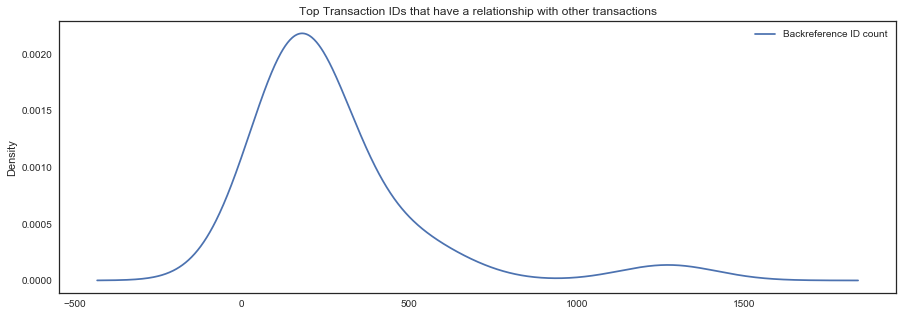

In [11]:
#Top Transaction IDs that have a relationship with other transactions[Most backreferenced IDS]

df1= df.dropna(subset=['bac_ref_id']) #Drops NAN values from the column
df1['counter']=1 #creates a new column in the dataframe and assigns value 1 to each row
df1=df1.groupby(['bac_ref_id'],as_index=False).sum() #groups the rows based on bac_ref_id and generatates the sum
df1=df1.sort_values('counter',ascending=False) #Sorts the specified column in descending order
df1=df1.drop(['ele_yea','can_off_dis','dis_amo'], axis=1) #drops the specified columns
df1= df1.head(20) #Picks the top 20 rows in the dataframe
df1.plot.density(figsize=(15,5)) #plots the graph
plt.title('Top Transaction IDs that have a relationship with other transactions')
plt.legend(('Backreference ID count', ))

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122], dtype=int64),
 <a list of 123 Text xticklabel objects>)

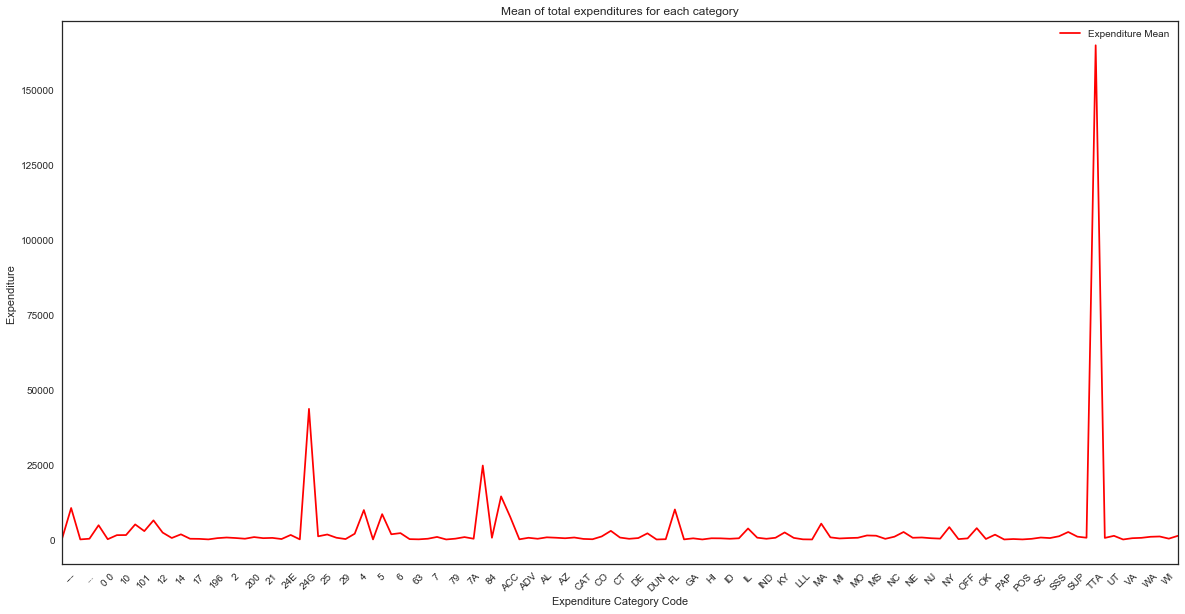

In [12]:
#Find the maximum expenditure for a category over all the years

sns.set_style('white')
df1=df.groupby(['cat_cod'], as_index=False).mean() #Groups the rows in the Dataframe and calculates the group mean
df1=df1.drop(['ele_yea'], axis=1)
df1=df1.drop(['can_off_dis'], axis=1) 
graph=df1.plot.line(x='cat_cod', y='dis_amo', color = 'r', figsize=(20,10), xticks= df1.index) #plots the graph
plt.title('Mean of total expenditures for each category')
plt.legend(('Expenditure Mean', ))
plt.ylabel('Expenditure ')
plt.xlabel('Expenditure Category Code')
#code segment below hides every alternate xaxis tick to make the graph more presentable
for label in graph.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
plt.xticks(rotation = 45) #to change the x axis ticks display angle

([<matplotlib.axis.XTick at 0x22002de90f0>,
 <a list of 56 Text xticklabel objects>)

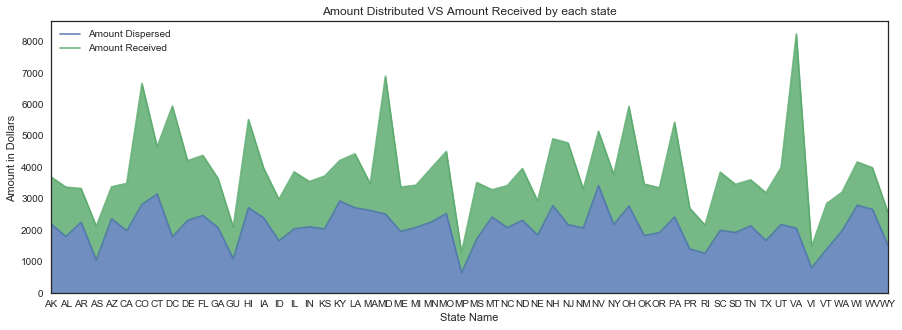

In [13]:
#Comparison of mean amount dispersed VS mean amount received by various states

temp_res=df.groupby(['rec_sta']).mean() #groups the rows based on rec_sta and generatates the mean
temp_dis=df.groupby(['can_off_sta']).mean() #groups the rows based on can_off_sta and generatates the mean
temp_res=temp_res.drop(['ele_yea','can_off_dis'], axis=1) #drops the specified columns
temp_dis=temp_dis.drop(['ele_yea','can_off_dis'], axis=1) #drops the specified columns
df1 = pd.concat([temp_dis,temp_res],axis=1, ignore_index=False) #concats the specified dataframes and stores it in dataframe df1
df1.columns = ['dis_amo', 'rec_amo'] #renames the columns of the dataframe df1
df1=df1.dropna(axis=0) #drops null values
df1.plot.area(alpha=0.8,figsize=(15,5)) #plots the graph
plt.title('Amount Distributed VS Amount Received by each state')
plt.ylabel('Amount in Dollars ')
plt.xlabel('State Name')
plt.legend(('Amount Dispersed', 'Amount Received', ))
plt.xticks(np.arange(len(df1.index)),df1.index) #generates tick values for the Xaxis

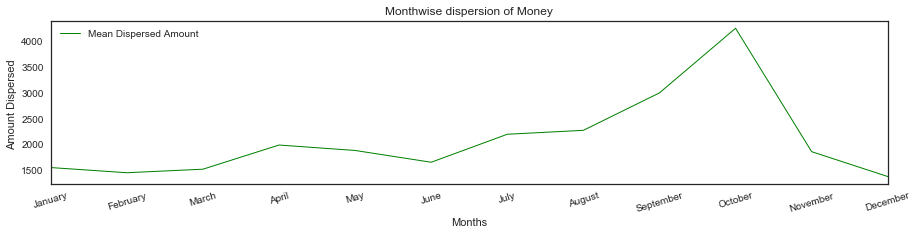

In [14]:
#Mean of dispersion amount over all the years monthwise

sns.set_style('white')
df['temp_month']=df['dis_dat'].dt.month #creates a new column in the dataframe and stores the month name of the date in that row
temp=df.groupby('temp_month').mean() #groups the rows based on temp_month and generatates the mean
temp.plot.line(x=temp.index,y='dis_amo',figsize=(15,3),lw=1, color='g') #plots the graph
plt.xticks(temp.index, calendar.month_name[1:13], rotation=17 ) #to display month names fully in the x axis
df=df.drop(['temp_month'], axis=1)
plt.title('Monthwise dispersion of Money')
plt.legend(('Mean Dispersed Amount', ))
plt.ylabel('Amount Dispersed ')
plt.xlabel('Months')

C:\Users\Vishal\Anaconda3\lib\site-packages\matplotlib\artist.py:233: MatplotlibDeprecationWarning:

get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.



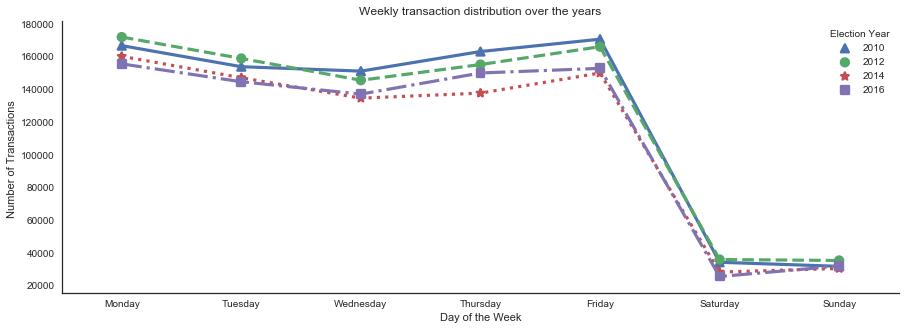

In [16]:
#show maximum transactions on which day over the years

df1= df.dropna(subset=['tra_id']) #drops null values from the column
df1['temp_count']=1 #creates a new column in the dataframe and assigns value 1 to each row
df1['temp_day']=df1['dis_dat'].dt.weekday_name #creates a new column in the dataframe and assigns weekday name of the respective date to each row
temp=df1.groupby(['ele_yea','temp_day'], as_index= False).sum() #groups the rows based on temp_month and generatates the mean
temp['temp_day'] = pd.Categorical(temp['temp_day'], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]) #change to categorical data type for sorting
temp=temp.drop(['can_off_dis', 'dis_amo'], axis=1)
temp=temp.sort_values('temp_day') #Sorts the entire dataframe based on temp_day
plt.figure(figsize=(15,5))
graph=sns.pointplot(x="temp_day", y="temp_count", hue="ele_yea", data=temp, markers=["^", "o", "*", "s"], linestyles=["-", "--", ":", "-."]);
plt.title('Weekly transaction distribution over the years')
sns.set_style('white')
sns.despine() #removes the top and right border from the graph figure
graph.get_axes().legend(title= 'Election Year',)
plt.ylabel('Number of Transactions ')
plt.xlabel('Day of the Week')